In [3]:
import numpy as np
import matplotlib.pyplot as plt
#font CMU Serif
plt.rcParams.update({'font.family': 'cmr10','font.size':'15','axes.formatter.use_mathtext':'True','mathtext.fontset':'cm'})
def plot_figure(datametro,label,title,):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    plt.suptitle(title, fontsize=16)
    plot_data(axs, datametro,title)
    plt.tight_layout()
    plt.show()    

def plot_data(axs, datametro, title):
    variable_mapping = {"Energy": 1}
    axs[0].errorbar(datametro[:,0], datametro[:,number], yerr=datametro[:,number+1],
                       color='#008080', ecolor='#90ee90',label='Metropoli')
    axs[0].set_title(title)
    axs[0].legend()
    
    axs[1].plot(datametro[:,0],datametro[:,number+1], color='#90ee90',label='Error')
    axs[1].set_title('Error')
    axs[1].set_xlabel('Blocks')
    axs[1].legend()

# Numerical Simulation Laboratory (NSL)
## Numerical exercises 8
The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters: $\sigma$ and $\mu$.
### Exercise 08.1
Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$
## <span style="color:purple"> Solution Exercise 08.1</span>

### Problem's Theory:
The Variational Monte Carlo is a very useful way of computing approximate ground state properties of many body systems. The variational principle assert that for any function $\psi_T$, the variational energy $E_T$ will be a minimum when $\psi_T$ is the exact ground state function of the Shrodinger equation. Where $E_T$ is defined as:$$ E_T:=\frac{\left<\psi_T|H|\psi_T\right>}{\left<\psi_T|\psi_T\right>}=\frac{\int d\vec{r}_1...d\vec{r}_N\psi_T*(\vec{r}_1,...,\vec{r}_N)H\psi_T(\vec{r}_1,...,\vec{r}_N)}{\int d\vec{r}_1...d\vec{r}_N|\psi_T(\vec{r}_1,...,\vec{r}_N)|^2}\ge E_0=\frac{\left<\psi_0|H|\psi_0\right>}{\left<\psi_0|\psi_0\right>}$$
The method consist in optimizing the vector parameter $\vec{a}$ of the wave function $\psi_T(\vec{a})$. If the family of functions is well chosen the ground state will be a good approximation.
When the Metropolis Monte Carlo method is used to compute $E_T$ and other expectation values, the method is called **Variational Monte Carlo** (*VMC*).\
To calculate the integral $$ E_T:=\frac{\left<\psi_T|H|\psi_T\right>}{\left<\psi_T|\psi_T\right>}=\int d\vec{r}_1...d\vec{r}_N p(\vec{r}_1,..,\vec{r}_N)E_{loc}(\vec{r}_1,...,\vec{r}_N)$$ can be used the Metropolis algorithm implemented previously 

### Problem's approach:
To solve this exercise I have computed: $$ E_{loc}(x) = \frac{\left[\hat{T}+\hat{U}\right]\Psi(x)}{\Psi(x)}=\frac{\left[\frac{-1}{2}\frac{\partial^2}{\partial x^2}+\hat{U}\right]\Psi(x)}{\Psi(x)}=\frac{-1}{2\Psi(x)}\frac{\partial^2\Psi(x)}{\partial x^2}+U(x)$$
Considering $m=\hbar=1$. In particular the Potential term is $$U(x)=x^4-\frac{5}{2}x^2 $$ While for the Kinetic term I have obtained: $$ \frac{-1}{2\Psi(x)}\frac{\partial^2\Psi(x)}{\partial x^2}=\frac{-1}{2\sigma^2\Psi(x)}\left[\left(\frac{(x-\mu)^2}{\sigma^2}-1\right)e^{-\frac{(x-\mu)^2}{2\sigma^2}}+\left(\frac{(x+\mu)^2}{\sigma^2}-1\right)e^{-\frac{(x+\mu)^2}{2\sigma^2}}\right]$$

### Code:
On the` func` class I've implemented two functions: $\Psi(x)$ and $\hat{H}\Psi(x)$ that i will use in the metropolis algorithm as the probability distribution and the observable to measure:
```cpp
//constructor
psi_8::psi_8() {}
psi_8::psi_8(double mu, double sigma) : m_mu(mu), m_sigma(sigma) {}
//destructor
psi_8::~psi_8() {}
//method to calculate the function
double psi_8::operator()(arma::vec r) const {return exp(-0.5*pow(r(0)-m_mu,2)*pow(m_sigma,-2))+exp(-0.5*pow(r(0)+m_mu,2)*pow(m_sigma,-2));}
```
```cpp
//constructor
Hpsi::Hpsi() {}
Hpsi::Hpsi(double mu, double sigma) : m_mu(mu), m_sigma(sigma) {}
//destructor
Hpsi::~Hpsi() {}
//method to calculate the function
double Hpsi::operator()(arma::vec r) const {
    double d2psi= 0.5*pow(m_hbar,2)/m_m*(((pow(m_sigma,2)-pow(r(0)-m_mu,2))*pow(m_sigma,-4))*exp(-0.5*pow(r(0)-m_mu,2)*pow(m_sigma,-2))+
                                        +((pow(m_sigma,2)-pow(r(0)+m_mu,2))*pow(m_sigma,-4))*exp(-0.5*pow(r(0)+m_mu,2)*pow(m_sigma,-2)));
    double psi=exp(-0.5*pow(r(0)-m_mu,2)*pow(m_sigma,-2))+exp(-0.5*pow(r(0)+m_mu,2)*pow(m_sigma,-2));
    double V=pow(r(0),4)-2.5*pow(r(0),2);
    return d2psi/psi+V;
    //return d2psi;
    }
```
### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a Simulated Annealing (SA) algorithm.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$
- show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation.
## <span style="color:purple"> Solution Exercise 08.2</span>

### Problem's Theory:
Simulated annealing is an analogy with the way that liquids freeze and crystallize, or metals cool and anneal. Starting at an high temperature molecules in a liquid move randomly. If temperature goes down kinetic energy is lost and atoms line themselves up and form a pure crystal
that is completely ordered over a distance up to billions of times the size of an individual atom in all directions. So for slowly cooled systems, nature is able to find this minimum energy state, in fact crystal is the state of minimum energy.\
The idea is to interpret the cost function $L(x)$, $x \in X_n$, as the energy of a statistical-mechanics system and consider the Boltzmann distribution $p(x) = exp[-\beta L(x)]/Z$. When $\beta \rightarrow \infty$ the distribution becomes concentrated on the minima of $L(x)$. Monte Carlo method allows to sample the Boltzmann distribution and can be used, when $\beta \rightarrow \infty$, as an optimization tecnique.\
The algorithm is initialized on a configuration $x_0$ and executes $n_1$ Monte Carlo steps at temperature $\frac{1}{\beta_1}$, $n_2$ steps at temperature $\frac{1}{\beta_2}$, …, and $n_N$ steps at temperature $\beta_N$. The final configuration of each cycle i (with $i = 1, …, N-1$) is used as the initial configuration of the next cycle. At a specific temperature $T=\frac{1}{\beta}$ and configuration $\vec{x}$ the energy is $L(\vec{x})$ and one new configuration is generated $\vec{x}'$. The acceptance probability is: $P(x)=\exp{-\beta(L(\vec{x}')-L(\vec{x}))} $ if $L(\vec{x}')\gt L(\vec{x})$ otherwise $p(x)=1$.

### Problem's approach:
To solve this problem I have build up a simulated annealing algortithm starting from the `Metropolis` class methods and the functions previously defined.
The idea is to cicle over all the $\beta_1,...,\beta_N$ with a *do{}while{}* cycle: 
- at every iteration of the cycle  $\mu$ and $\sigma$ are updated with a random step
- the probability distribution and the observable are defined with the new and the old parameters
- A Metropolis algorithm is created to sample the distribution and calculate the energy with the new and the old parameters
- From the comparison between the old and the new energy the new paramaters are accepted or rejected
In this way is implemented a search in the parameters space. The interesting part is that the lenght of the step proposed is proportional to the temperature, so the steps become smaller while the correct set of parameters is reached.

### Code:
Crucial parts of the code in the implementation of the simulated annealing:
```cpp
 do{
         // ... manage files ...
        double T = 1./_beta;
        vec vec_rand(dimension);
        // 1) Propose of the step gaussian or uniform
        if (m_gaussian) {
            for (int i = 0; i < dimension; ++i) {
                vec_rand(i) = rnd.Gauss(0, T);
            }
        } else {
            for (int i = 0; i < dimension; ++i) {
                vec_rand(i) = rnd.Rannyu(-T, T);
            }
        }
        vec r_new=m_r+vec_rand;
        vec H={0.,0.};
        // 2a) calculate the old energy
        mu=m_r(0); sigma=m_r(1);
        psi.Set_mu(mu); psi.Set_sigma(sigma);
        hpsi.Set_mu(mu); hpsi.Set_sigma(sigma); 
            Metropolis metro(psi,x_start,hpsi);
            metro.Set_a(Nstep,start,initial_increment,ratio_target,tolerance,rnd,dimension);
            metro.Average(Nblock,Blocksize,filename);
            H=metro.Get_average();
        // 2b) calculate the new energy 
        mu=r_new(0); sigma=r_new(1);
        psi.Set_mu(mu); psi.Set_sigma(sigma);
        hpsi.Set_mu(mu); hpsi.Set_sigma(sigma);
        Metropolis metro_new(psi,x_start,hpsi);
        metro_new.Set_a(Nstep,start,initial_increment,ratio_target,tolerance,rnd,dimension);
        metro_new.Average(Nblock,Blocksize,filename2);
        vec H_new=metro_new.Get_average();
        // 3) accept or reject the move proposed
        double p=exp(-_beta*H(0));
        double pnew=exp(-_beta*H_new(0));
        double A = min(1.,pnew/p);
        double accept = rnd.Rannyu(0,1);
        if (accept <= A) {
                _beta++;
                //update m_r
                m_r = r_new;
                // ...save measures on files...
            } else {//..file manage...}
    }while(_beta<=1001);
    return 0;
}
```
### Plot parameters:
- $N_{step}=10^4$ to set the corret acceptance ratio in the metropolis
- $N_{blocks}=10^3$
- $L_{block}=10^3$
- $\beta_{max}=10^3$ 

### Results: 
As we can see from the following plots the simulated annealing implemented return results coherent with what expected, in particular is showed: 
- The sampling of the probability distribution $|\Psi(x)|^2$
- The Energy $\left<H\right>$ computed with block average and with simulated annealing
- The search is the parameter space
- An histogram with the sampled configurations

- The best parameters found are:
    - $\mu_{best}   =  -0.787466$ 
    - $\sigma_{best}=  -0.609165$

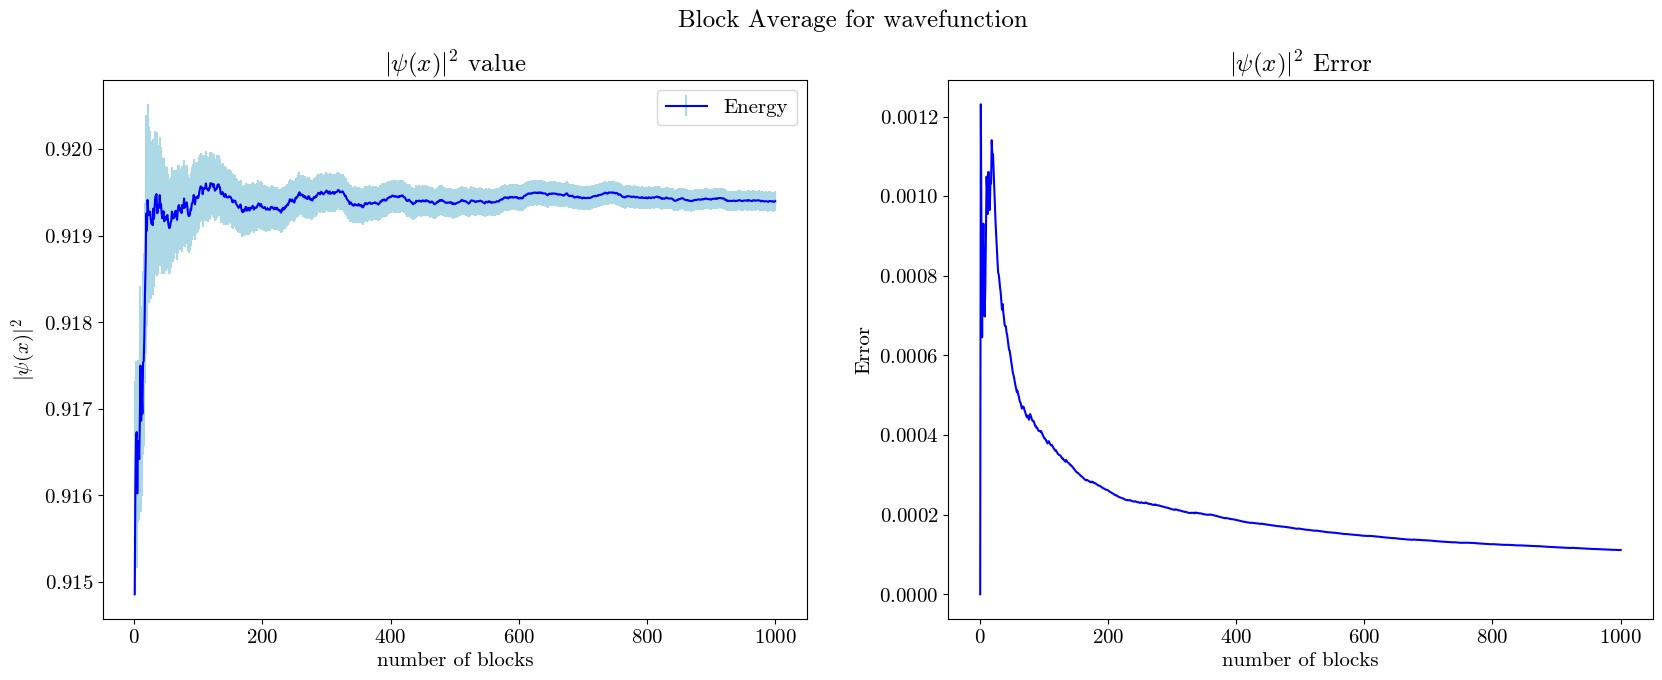

In [5]:
#load data 
fig,axs = plt.subplots(1,2,figsize=(20,7))
plt.suptitle('Block Average for wavefunction')
data=np.loadtxt('../lecture_8/Results/ex_|psi|^2.dat',skiprows=1)
axs[0].errorbar(data[:,0],data[:,1],yerr=data[:,2],color='blue',ecolor='lightblue',label='Energy')
axs[0].set_title('$|\\psi(x)|^2$ value')
axs[0].set_xlabel('number of blocks')
axs[0].set_ylabel('$|\\psi(x)|^2$')
axs[1].plot(data[:,0],data[:,2],color='blue')
axs[1].set_title('$|\\psi(x)|^2$ Error')
axs[1].set_xlabel('number of blocks')
axs[1].set_ylabel('Error')
axs[0].legend()
plt.show()

This plot shows the blocking average value of the probability distribution and the error associated sampled in the last metropolis.

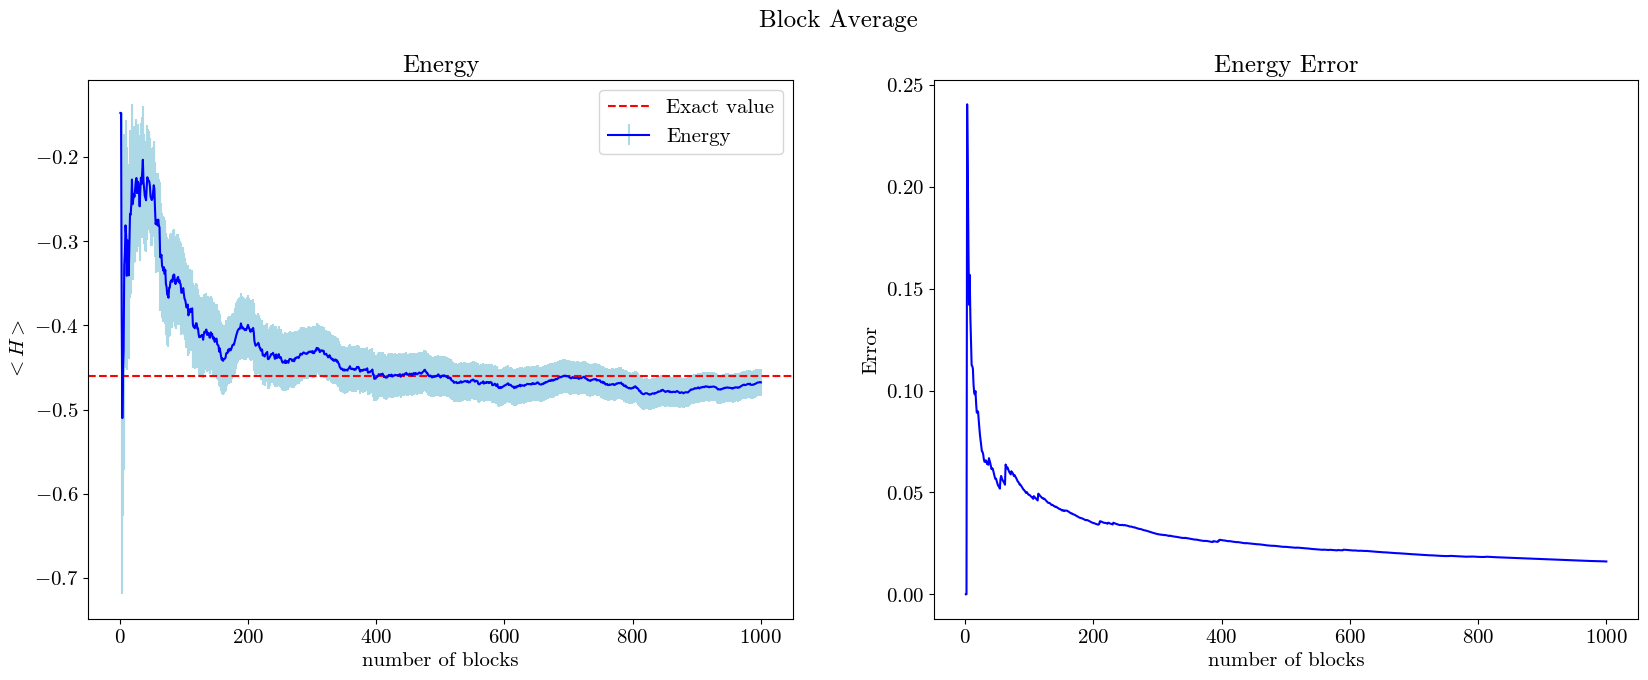

In [ ]:
#load data 
data=np.loadtxt('../lecture_8/Results/ex_Hpsi.dat',skiprows=1)
fig,axs = plt.subplots(1,2,figsize=(20,7))
plt.suptitle('Block Average')
axs[0].errorbar(data[:,0],-data[:,1],yerr=data[:,2],color='blue',ecolor='lightblue',label='Energy')
axs[0].set_title('Energy')
axs[0].set_xlabel('number of blocks')
axs[0].set_ylabel(r'$<H>$')
axs[0].axhline(-0.4604658796926825,color='red',linestyle='--',label='Exact value')
axs[1].plot(data[:,0],data[:,2],color='blue')
axs[1].set_title('Energy Error')
axs[1].set_xlabel('number of blocks')
axs[1].set_ylabel('Error')
axs[0].legend()
plt.show()

This plot shows the blocking average value of the Energy and the error associated sampled in the last metropolis.\
The value of $\mu$ and $\sigma$ are best found and in fact the energy is coherent with the expected value. 

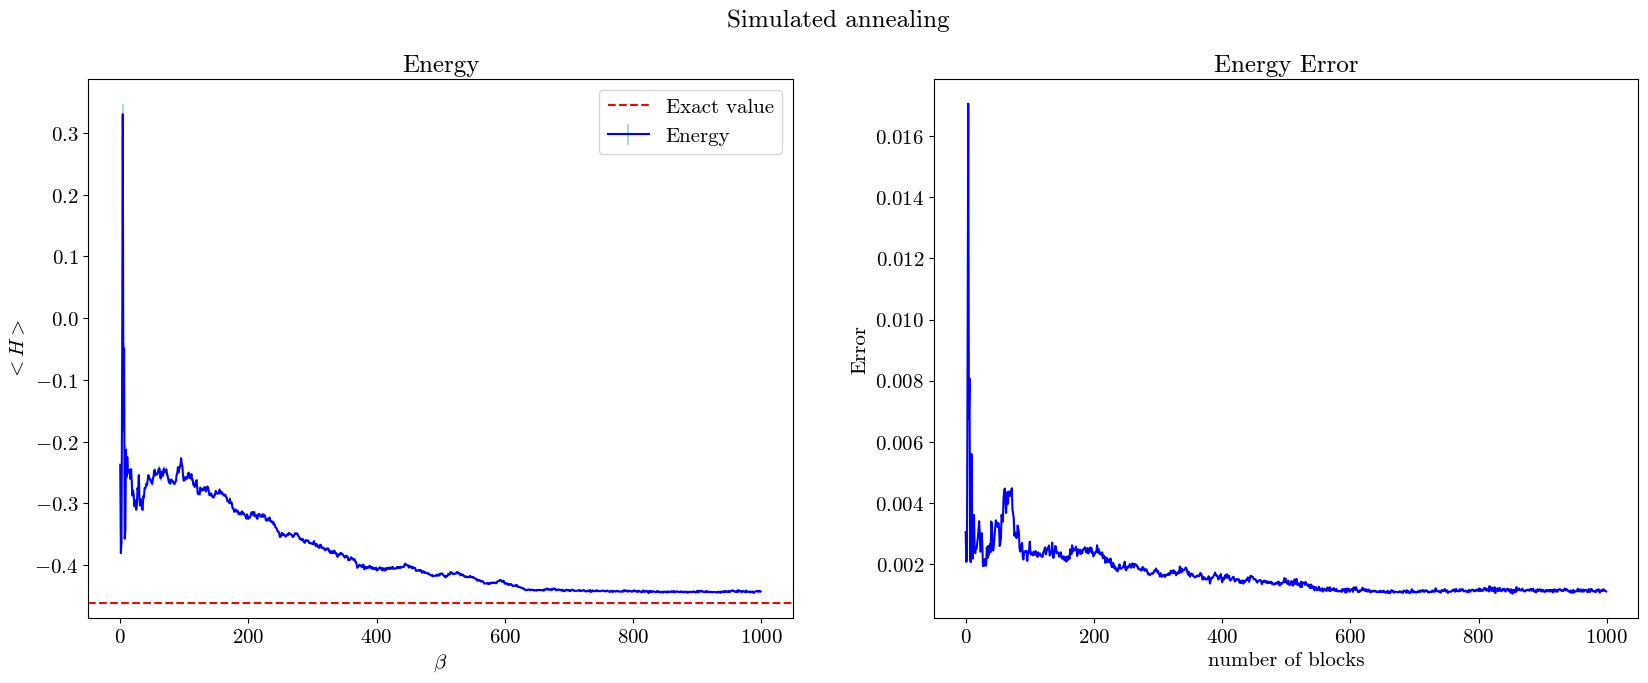

In [7]:
#load data 
data=np.loadtxt('../lecture_8/Results/H.dat',skiprows=1)
fig,axs = plt.subplots(1,2,figsize=(20,7))
plt.suptitle('Simulated annealing')
axs[0].errorbar(np.arange(0,len(data[1000:,0])),data[1000:,0],yerr=data[1000:,1],color='blue',ecolor='lightblue',label='Energy')
axs[0].set_title('Energy')
axs[0].set_xlabel(r'$\beta$')
axs[0].set_ylabel('$<H>$')
axs[0].axhline(-0.4604658796926825,color='red',linestyle='--',label='Exact value')
axs[1].plot(np.arange(0,len(data[1000:,0])),data[1000:,1],color='blue')
axs[1].set_title('Energy Error')
axs[1].set_xlabel('number of blocks')
axs[1].set_ylabel('Error')
axs[0].legend()
plt.show()

This plots shows the simulted annealing process. In particular is shown The energy in function of the temperature and how the error decrease. As we can see the valures of the energy obtained from the algorithm are not equal to the real values. This is due to the fact that the algorithm has limitations and is only an approximation of the real solution (the ground state).

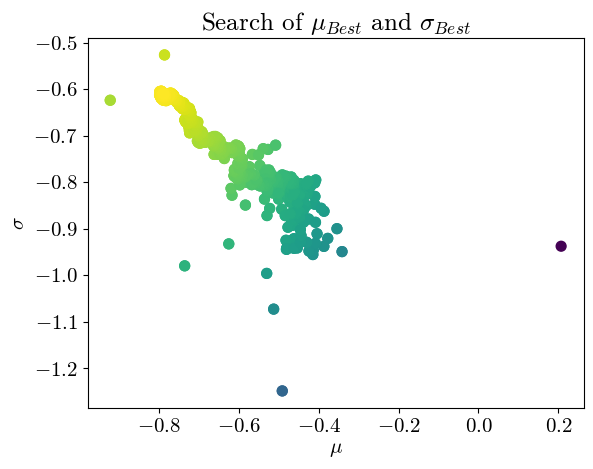

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Example data: points with (mu, sigma) values
points = np.loadtxt('../lecture_8/Results/traj.dat',skiprows=1)  # Replace with your actual points
# Best values for mu and sigma
mu_best = -0.787466
sigma_best = -0.609165
# Calculate the Euclidean distance to the best (mu, sigma)
distances = np.sqrt((points[:, 0] - mu_best)**2 + (points[:, 1] - sigma_best)**2)
# Normalize distances between 0 and 1 for colormap
norm_distances = (distances - distances.min()) / (distances.max() - distances.min())
# Use the inverted colormap to get the colors
colors = cm.viridis_r(norm_distances)
# Plotting the points with the colors and without cmap
plt.scatter(points[:, 0], points[:, 1], c=colors, s=50)
# Adding labels and title
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title(r'Search of $\mu_{Best}$ and $\sigma_{Best}$')
# Show the plot
plt.show()


In this code is shown how the parameter space is been investigated by the simulated annealing process. As we can see the jumps becomes shorter while the best parameters are reached in fact the temperture goes down.

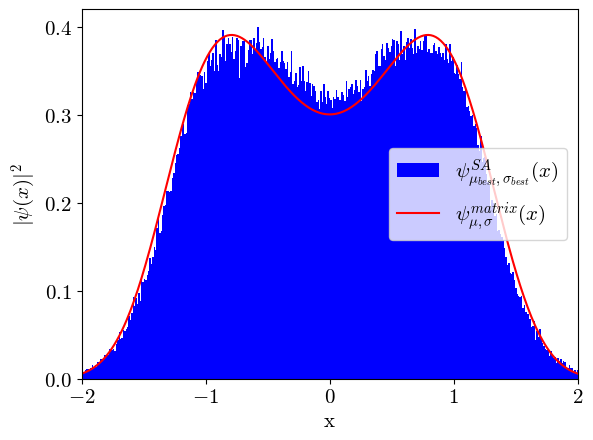

In [10]:
#load data 
data=np.loadtxt('../lecture_8/Results/psi.dat',skiprows=1)
plt.hist(data,color='blue',bins=500,density=True,label=r'$\psi_{\mu_{best},\sigma_{best}}^{SA}(x)$')
plt.xlabel('x')
plt.xlim(-2,2)
plt.ylabel('$|\\psi(x)|^2$')
# Comparison with theorical values
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations
# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
plt.plot(x,(psi[0])**2,color='red',label=r'$\psi_{\mu,\sigma}^{matrix}(x)$')
plt.legend()
plt.show()

In this plot is shown the histogram of the sampling of the wavefunction with best parameters $\Psi_{\mu_{best},\sigma_{best}}(x)$. 
It is coherent with the distribution expected from the theory. 
In conclusion, **simulated annealing** is an effective method for approximating the ground state. However, it remains an approximation, as the energy value obtained is not the theoretically expected minimum. This discrepancy arises because the functional form of the solutions is approximate from the outset.
